In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd

tree = DecisionTreeClassifier(criterion = 'entropy')
data = pd.read_excel('dataset.xlsx')
#数据预处理
feature_col_num = data.shape[1] - 1
for i in range(feature_col_num):
    data.iloc[:, i] = LabelEncoder().fit_transform(data.iloc[:, i].values)
#x 为 特征
x = data.iloc[:, 0:4]
#y 为标签
y = data.iloc[:, 4]
tree.fit(x, y)
x.head()

,Outlook,Temperate,Humidity,Windy
0,2,1,0,0
1,2,1,0,1
2,0,1,0,0
3,1,2,0,0
4,1,0,1,0


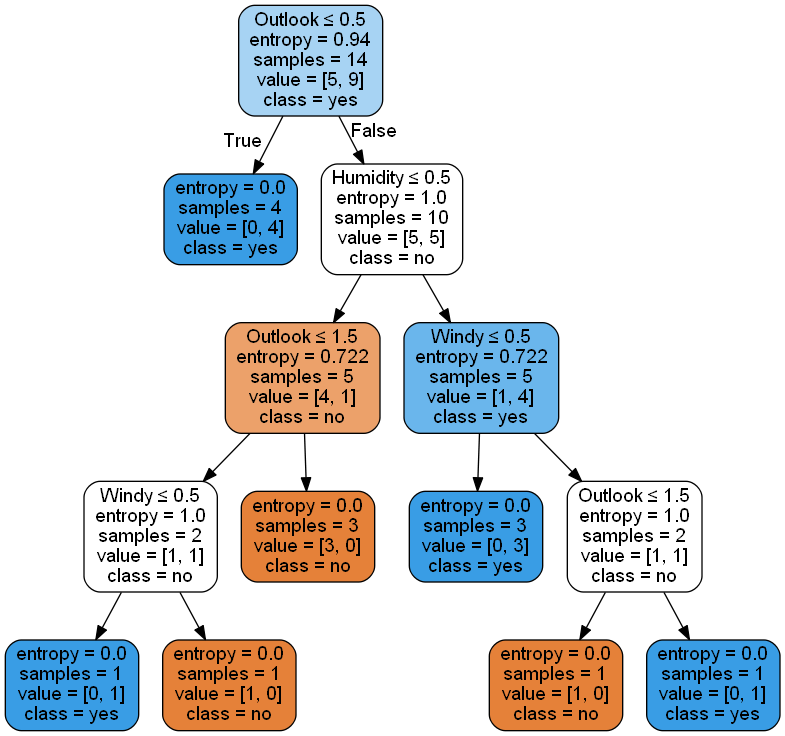

In [2]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydotplus
from IPython.core.display import Image
#pydotplus需要先安装

dot_data = StringIO()
export_graphviz(tree , out_file = dot_data , filled = True ,
               feature_names = data.columns[:4],
               class_names = data['Play?'].unique() ,
               rounded = True , special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())